# Linear Regression Exercise

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)


X = np.hstack((np.ones_like(X), X))

In [32]:
order = np.random.permutation(len(X))
portion = 20

"""
    Split your data into train and test using the order and permutation variable
"""
train_x = X[order[portion:],:]
train_y = Y[order[portion:],:]

test_x = X[order[:portion],:]
test_y = Y[order[:portion],:]

In [46]:
def get_gradient(w, x, y):
    """
        Enter code for error, mse and gradient
    """
    y_estimate = x.dot(w).flatten()
    error = y.flatten() - y_estimate
    mse =   (1/len(y))*np.sum(np.square(error))
    gradient = (-1/len(y))*error.dot(x)
    
    return gradient, mse

In [53]:
w = np.random.randn(2)
alpha = 0.05

"""
    Using the get_gradient function, run the Linear regression
    use iteration of 10000
"""
for i in range(10000):
    gradient, mse = get_gradient(w, train_x, train_y)
       
    if i% 100 == 0:
        print("Iterations: %d -Error : %.4f" %(i, mse))
        
    w = w - alpha*gradient ## Change to your value

print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

Iterations: 0 -Error : 12.8300
Iterations: 100 -Error : 5.4566
Iterations: 200 -Error : 3.6999
Iterations: 300 -Error : 2.6985
Iterations: 400 -Error : 2.1276
Iterations: 500 -Error : 1.8022
Iterations: 600 -Error : 1.6167
Iterations: 700 -Error : 1.5110
Iterations: 800 -Error : 1.4507
Iterations: 900 -Error : 1.4163
Iterations: 1000 -Error : 1.3967
Iterations: 1100 -Error : 1.3856
Iterations: 1200 -Error : 1.3792
Iterations: 1300 -Error : 1.3756
Iterations: 1400 -Error : 1.3735
Iterations: 1500 -Error : 1.3723
Iterations: 1600 -Error : 1.3717
Iterations: 1700 -Error : 1.3713
Iterations: 1800 -Error : 1.3711
Iterations: 1900 -Error : 1.3709
Iterations: 2000 -Error : 1.3709
Iterations: 2100 -Error : 1.3708
Iterations: 2200 -Error : 1.3708
Iterations: 2300 -Error : 1.3708
Iterations: 2400 -Error : 1.3708
Iterations: 2500 -Error : 1.3708
Iterations: 2600 -Error : 1.3708
Iterations: 2700 -Error : 1.3708
Iterations: 2800 -Error : 1.3708
Iterations: 2900 -Error : 1.3708
Iterations: 3000 -Err

Plotting the Model we obtained

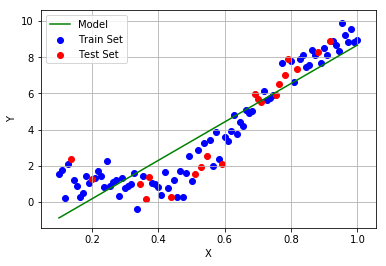

In [52]:
plt.plot(X[:,1], X.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Generate contour plot of the cost function

/usr/lib/python3/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


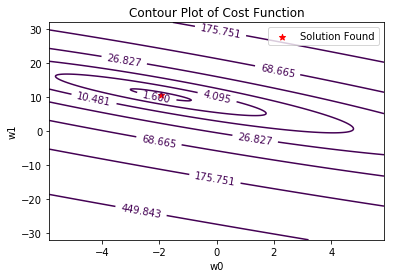

In [49]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

Extra Exercises.

Describe what you see in the both diagrams you have.

In [ ]:
#The first diagram draw a line of best fit on the splitted train-test data 
#while the second diagram displays rounds of convergence values before the coverging value of 1.3708